In [1]:
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
from getdist import *

# import planckStyle
import pylab
import numpy as np
# import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

# import planckStyle
import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains, plot_lines, plot_dkl

# matplotlib.use('TkAgg')
%matplotlib inline

Initalizing nu density look up table... Done


2023-03-26 19:50:45.120344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 19:50:45.215008: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-26 19:50:45.215025: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-26 19:50:45.769552: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
dir_name = '/home/isidro/Documents/github/SN_reconstructions_lsst/chains/'

<Figure size 720x648 with 0 Axes>

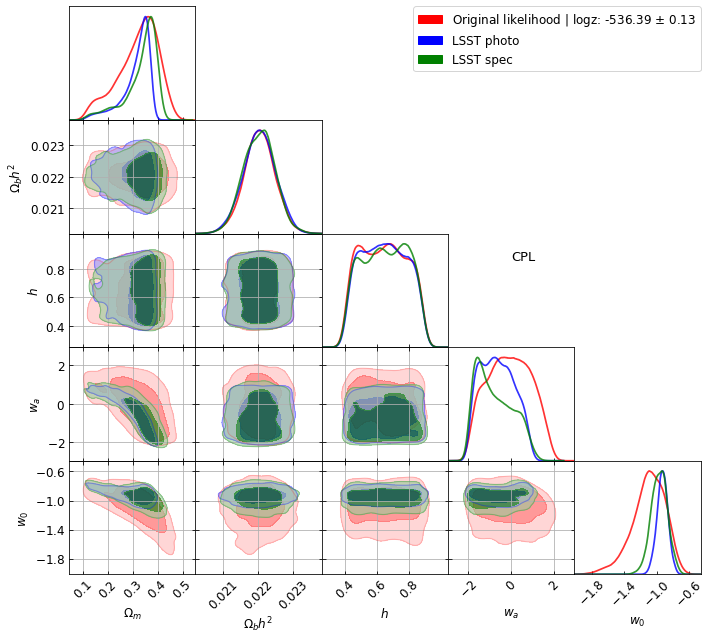

In [3]:
roots1 = ['waCDM_phy_Pantheon_nested_multi',
          'waCDM_phy_SNlsstphoto_nested_multi',
          'waCDM_phy_SNlsstspec_nested_multi',
         ]

g = plots.getSinglePlotter(chain_dir = dir_name, width_inch= 10,
                          ratio = 0.9, 
                          analysis_settings={'smooth_scale_2D': 0.3,
                                             'smooth_scale_1D': 0.3, 
                                             'ignore_rows': 0.0})

#g.settings.axes_fontsize = 5
g.settings.lab_fontsize = 15
g.settings.x_label_rotation= 45
#g.settings.alpha_filled_add = 0.9
g.settings.legend_fontsize = 15
g.settings.axes_fontsize = 15   
g.settings.lw1 = 3
g.settings.linewidth_contour = 2


g.triangle_plot(roots1, ['Om','Obh2', 'h', 'wa', 'w'],                           
                diag1d_kwargs={'colors':['red', 'blue', 'green', 'purple', 'orange'], 
                               'alphas':[0.8, 0.8, 0.8]},
                colors=['red', 'blue', 'green', 'purple', 'orange'],
                alphas = [0.4, 0.6, 0.6],
                legend_labels=['Original likelihood | logz: -536.39 $\pm$ 0.13',
                               'LSST photo',
                               'LSST spec'
                              ],
                legend_loc='upper right',
                filled = True,
                normalized=False, shaded=False, 
#                 param_limits={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]},
                
#                 parampriors={'mquin': [0, 3], 'mphan':[0, 2], 'beta':[-8, 12]}
           )

g.subplots[1,0].grid(True)
g.subplots[2,0].grid(True)
g.subplots[2,1].grid(True)
g.subplots[3,0].grid(True)
g.subplots[3,1].grid(True)
g.subplots[3,2].grid(True)
g.subplots[4,0].grid(True)
g.subplots[4,1].grid(True)
g.subplots[4,2].grid(True)
g.subplots[4,3].grid(True)


g.add_text('CPL', x= -0.5, y=2.8, fontsize=13)

# plt.savefig("wacdm_LSST_corner.png", dpi=100)

In [4]:
def eos(z, params):
    w0, wa = params
    return w0 + (z/(1+z))*wa

/tmp/ipykernel_11857/1241179766.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('Greens_r')
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


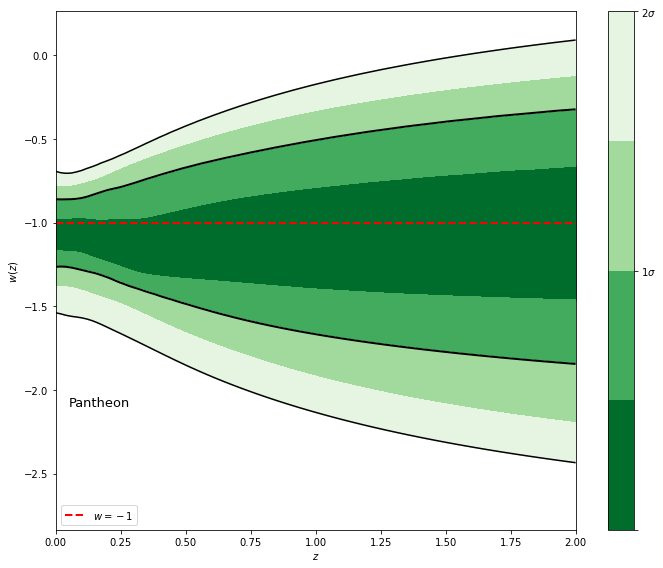

In [5]:
fig = plt.figure(figsize=(10, 8))

file_root = dir_name + 'waCDM_phy_Pantheon_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('Greens_r')

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root)
k = np.linspace(0,2,100)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')

plt.tight_layout()

plt.legend(loc='lower left')
plt.text(0.05,-2.1, 'Pantheon', fontsize=13)
plt.savefig('cplEoS.png')


/tmp/ipykernel_11857/222763454.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('Greens_r')
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


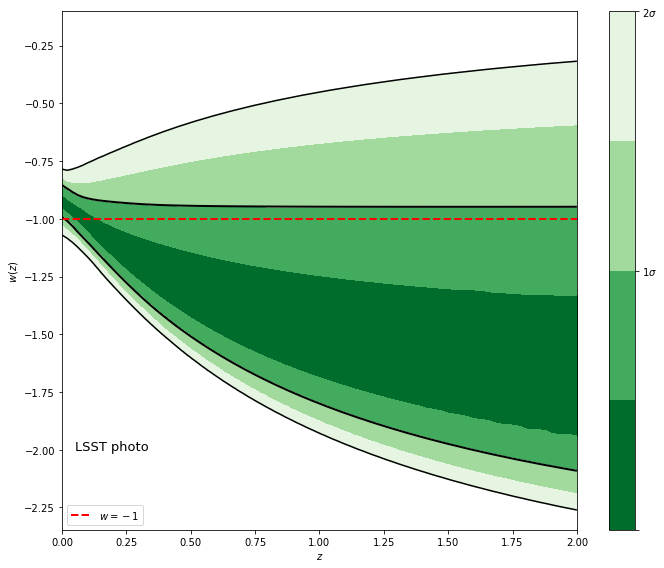

In [6]:
fig = plt.figure(figsize=(10, 8))
file_root = dir_name + 'waCDM_phy_SNlsstphoto_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('Greens_r')

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root)
k = np.linspace(0,2,100)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')

plt.tight_layout()

plt.legend(loc='lower left')
plt.text(0.05,-2, 'LSST photo', fontsize=13)
plt.savefig('cplEoS_lsstphoto.png')

/tmp/ipykernel_11857/1684677192.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('Greens_r')
Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


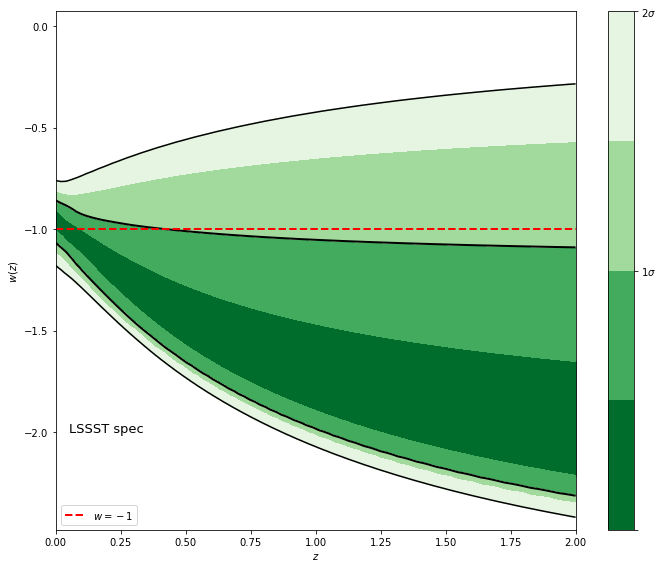

In [7]:
fig = plt.figure(figsize=(10, 8))

file_root = dir_name + 'waCDM_phy_SNlsstspec_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('Greens_r')

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root)
k = np.linspace(0,2,100)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2],  
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2,3])
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$',r'$3\sigma$'])

plt.hlines(-1, xmin=0, xmax=2, colors='r',  linestyles='dashed', label='$w=-1$', lw=2)
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')

plt.tight_layout()

plt.legend(loc='lower left')
plt.text(0.05,-2, 'LSSST spec', fontsize=13)
plt.savefig('cplEoS_lsstspec.png')